In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model = 'Lorenz63'
da_method = 'KF'
df = pd.read_csv('./' + model + '_' + da_method + '.csv')

In [3]:
df

,timestep,x_true,y_true,z_true,x_sim,y_sim,z_sim,x_da,y_da,z_da,x_obs,y_obs
0,0.00,0.000000,10.000000,20.000000,1.000000,11.000000,19.500000,1.000000,11.000000,19.500000,None,None
1,0.05,3.974004,10.470530,18.537555,5.061544,11.882233,18.775006,5.061544,11.882233,18.775006,None,None
2,0.10,6.916687,12.448457,19.188226,8.190494,14.067054,20.517705,8.190494,14.067054,20.517705,None,None
3,0.15,9.616634,14.850631,22.148285,10.944594,15.923133,24.801565,10.944594,15.923133,24.801565,None,None
4,0.20,11.974400,15.868959,27.324587,12.876939,15.264613,30.648890,11.935543,15.943442,30.459555,11.92,15.95
5,0.25,13.158802,13.690046,32.867020,13.044082,11.219331,35.079514,12.790156,12.111729,35.014911,None,None
6,0.30,12.382207,8.869207,35.640688,11.208567,6.075685,35.631455,11.388929,6.821176,36.053513,None,None
7,0.35,9.984532,4.366882,34.616637,8.378024,2.630289,33.108733,8.695973,2.971953,33.788808,None,None
8,0.40,7.193353,1.974796,31.505801,5.780098,1.318524,29.583079,6.559324,1.707149,28.970958,7.19,1.94
9,0.45,4.962804,1.338797,28.010766,3.987496,1.268649,26.165344,4.638238,1.776076,25.784603,None,None


In [4]:
timestep = df[' timestep'].tolist()

In [5]:
x_true, y_true, z_true = df[' x_true'].tolist(), df[' y_true'].tolist(), df[' z_true'].tolist()
x_sim, y_sim, z_sim = df[' x_sim'].tolist(), df[' y_sim'].tolist(), df[' z_sim'].tolist()
x_da, y_da, z_da = df[' x_da'].tolist(), df[' y_da'].tolist(), df[' z_da'].tolist()

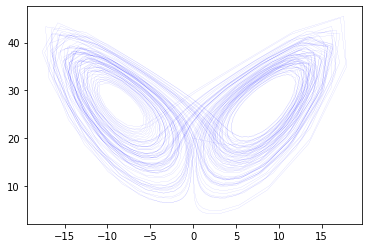

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_true[:], z_true[:], 'b', linewidth=0.05, label='True')
#ax.plot(x_sim[:], y_sim[:], 'b:', label='True')

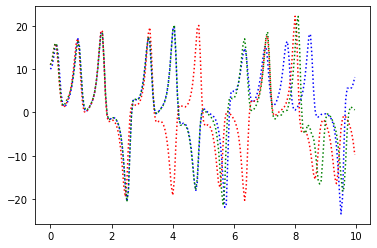

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(timestep[:200], y_true[:200], 'b:', label='True')
ax.plot(timestep[:200], y_sim[:200], 'r:', label='Sim')
ax.plot(timestep[:200], y_da[:200], 'g:', label='Sim')